In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
df_data = pd.read_csv('/kaggle/input/iris/Iris.csv')

In [4]:
df_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


Remove Id Column:

In [5]:
df_data.drop('Id',axis=1,inplace=True)

In [6]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


All the features of our dataset are of same data type float.

The label of the dataset is in Text format.

Also looking at the number of non null count of above columns we get that data does not contain any null values.

There are 150 rows and 5 columns in our dataset.

In [7]:
df_data.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

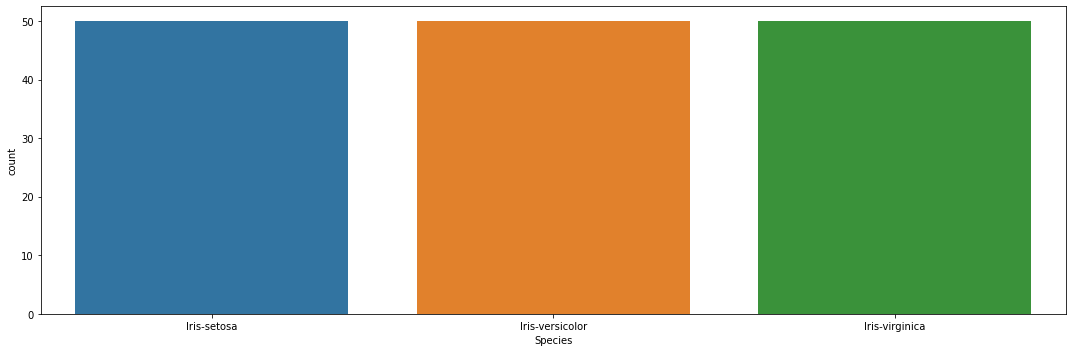

In [8]:
plt.figure(figsize=(15,5))
sns.countplot(df_data.Species)
plt.tight_layout()

Using LabelEncoder Function to Mapping target column :

In [9]:
LE = LabelEncoder()
df_data.Species = LE.fit_transform(df_data.Species)

In [10]:
df_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


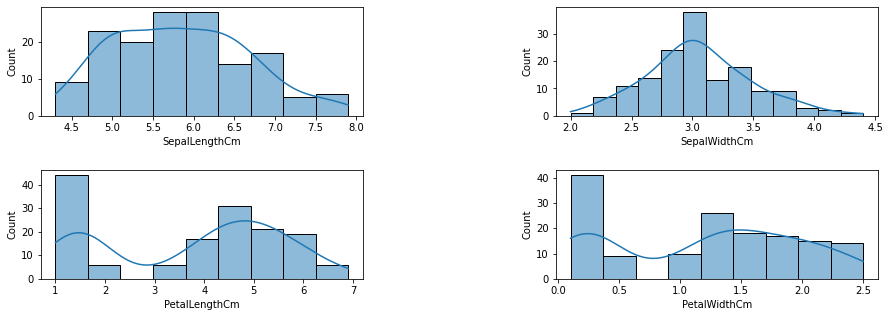

In [11]:
fig,axes = plt.subplots(2,2,figsize=(15,5))
for i , j in enumerate(df_data.columns[:-1]):
    sns.histplot(data=df_data,x = j, kde=True, ax = axes[i//2,i%2])
plt.subplots_adjust(wspace=0.6,hspace=0.5)
    

In [12]:
# Specify X , y from df_data: 
X = df_data.drop('Species',axis=1)
y = df_data.Species

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

Normalizing the values:

In [14]:
MinMax = MinMaxScaler()
X_train = MinMax.fit_transform(X_train)
X_test = MinMax.transform(X_test)

Let's Try different Algorithms on this dataset now. first I'll be using SVM and second algorithm is KNN:

In some cases, trying all possible combinations of all parameters as GridSearchCV
usually does, is not a good idea. For example, SVC has a kernel parameter, and
depending on which kernel is chosen, other parameters will be relevant. If kernel='linear', the model is linear, and only the C parameter is used. If kernel='rbf',
both the C and gamma parameters are used (but not other parameters like degree). In
this case, searching over all possible combinations of C, gamma, and kernel wouldn’t
make sense: if kernel='linear', gamma is not used, and trying different values for
gamma would be a waste of time. To deal with these kinds of “conditional” parameters,
GridSearchCV allows the param_grid to be a list of dictionaries. Each dictionary in the
list is expanded into an independent grid. A possible grid search involving kernel and
parameters could look like this:

In [15]:
# Hyperparameter Tuning using Grid Search CV for Support vector machine.
param_grid = [{'kernel':['rbf'],'C':[0.001, 0.01, 0.1, 1, 10, 100],'gamma':[0.001, 0.01, 0.1, 1, 10, 100]},
            {'kernel':['linear'],'C':[0.001, 0.01, 0.1, 1, 10, 100]}]
kfold = KFold(n_splits=5,shuffle=True,random_state=0)
grid = GridSearchCV(SVC(),param_grid,cv=kfold)
grid.fit(X_train,y_train)
print('Score on Train Data is: {:.2f}'.format(grid.score(X_train,y_train)))
print('Score on Test Data is: {:.2f}'.format(grid.score(X_test,y_test)))
print('Best Params is: {}'.format(grid.best_params_))
print('Best score is: {}'.format(grid.best_score_))

Score on Train Data is: 0.99
Score on Test Data is: 0.90
Best Params is: {'C': 1, 'gamma': 10, 'kernel': 'rbf'}
Best score is: 0.9833333333333334


In [16]:
y_pred = grid.predict(X_test)
y_train_pred = grid.predict(X_train)

In [17]:
print('Classification report \n',classification_report(y_test,y_pred))

Classification report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.82      0.90      0.86        10
           2       0.91      0.83      0.87        12

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30



[Text(0.5, 1.0, 'Confusion matrix on train data')]

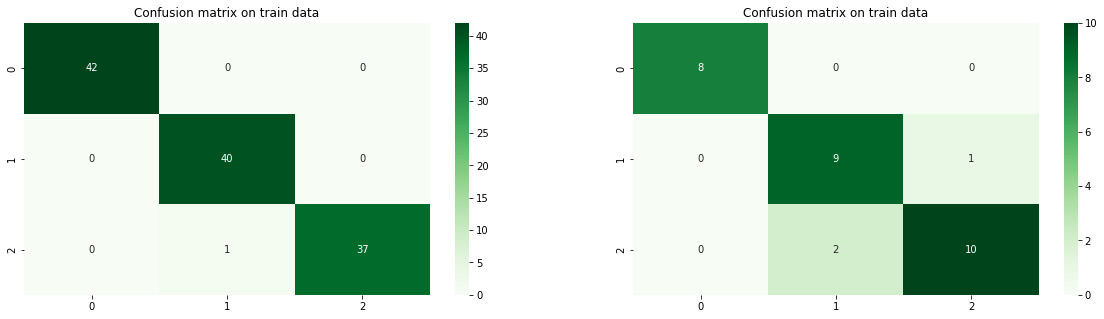

In [18]:
fig,axes = plt.subplots(1,2,figsize=(20,5))
sns.heatmap(confusion_matrix(y_train,y_train_pred),annot=True,cmap = 'Greens', ax = axes[0]).set(title='Confusion matrix on train data')
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap = 'Greens', ax = axes[1]).set(title='Confusion matrix on train data')

In [19]:
param_grid = {'n_neighbors': range(3,21,2),'metric':['euclidean','manhattan','minkowski']}
kfold = KFold(n_splits=5,shuffle=True,random_state=0)
grid = GridSearchCV(KNeighborsClassifier(),param_grid,cv=kfold)
grid.fit(X_train,y_train)
print('Score on Train Data is: {:.2f}'.format(grid.score(X_train,y_train)))
print('Score on Test Data is: {:.2f}'.format(grid.score(X_test,y_test)))
print('Best Params is: {}'.format(grid.best_params_))
print('best score is: {}'.format(grid.best_score_))

Score on Train Data is: 0.97
Score on Test Data is: 0.90
Best Params is: {'metric': 'euclidean', 'n_neighbors': 3}
best score is: 0.9833333333333334


In [20]:
y_pred = grid.predict(X_test)
y_train_pred = grid.predict(X_train)

In [21]:
print('Classification report \n',classification_report(y_test,y_pred))

Classification report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.82      0.90      0.86        10
           2       0.91      0.83      0.87        12

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30



[Text(0.5, 1.0, 'Confusion matrix on train data')]

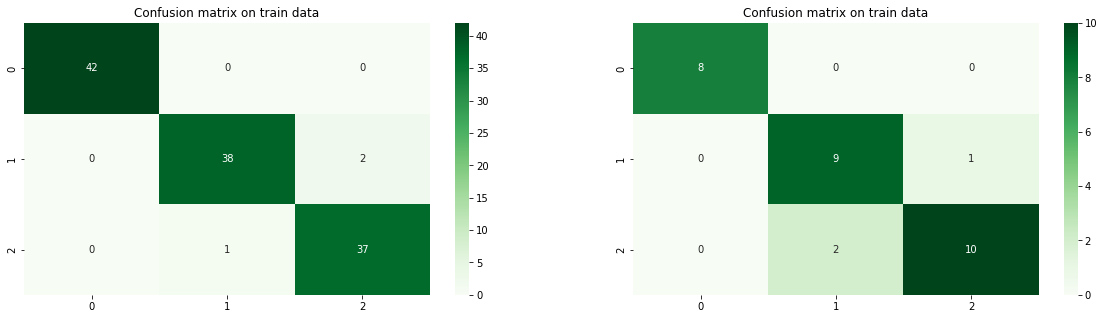

In [22]:
fig,axes = plt.subplots(1,2,figsize=(20,5))
sns.heatmap(confusion_matrix(y_train,y_train_pred),annot=True,cmap = 'Greens', ax = axes[0]).set(title='Confusion matrix on train data')
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap = 'Greens', ax = axes[1]).set(title='Confusion matrix on train data')
